In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Class War in Titanic

**TASK**: Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic. For each of the following questions state clearly your assumptions and discuss your findings:

1. Describe the type and the value range of each attribute. Indicate and transform the attributes that can be Categorical.
2. Plot histograms for the travel class, embarkation port, sex and age attributes. For the latter one, use discrete decade intervals.
3. Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.
4. For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.
5. Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.
6. Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index.

In [2]:
from IPython.core.display import HTML
titanic_html = HTML(filename = 'Data/titanic.html')

1. Describe the type and the value range of each attribute. Indicate and transform the attributes that can be Categorical.

In [3]:
titanic_excel = pd.read_excel('Data/titanic.xls')
titanic_excel.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Here below are reported all the 14 attribute defined in the excel sheet. For each attribute, we report the number of non-zero elements (`* non-null`), followed by the corresponding type.

In [5]:
titanic_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


Now we investigate the range of each numeric attribute, as reported in teh rows labeled **min** and **max**.

In [7]:
titanic_excel.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Overall, the attributes can be grouped as:

- Non-categorical:`name`, `age`, `ticket`, `fare`, `cabin`, `boat`, `body`, `home/dest`.

- Categorical: `sex`, `pclass`, `survived`, `sibsp` (number of siblings), `parch` (number of parents), `embarked`.

In [8]:
categorical_attr = ['sex', 'pclass', 'survived', 'sibsp', 'parch', 'embarked']
noncategorical_attr = ['name', 'age', 'ticket', 'fare', 'cabin', 'boat', 'body', 'home.dest']

for aa in categorical_attr:
    titanic_excel[aa] = titanic_excel[aa].astype('category')
    print(aa+': ', titanic_excel[aa].unique())

sex:  [female, male]
Categories (2, object): [female, male]
pclass:  [1, 2, 3]
Categories (3, int64): [1, 2, 3]
survived:  [1, 0]
Categories (2, int64): [1, 0]
sibsp:  [0, 1, 2, 3, 4, 5, 8]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 8]
parch:  [0, 2, 1, 4, 3, 5, 6, 9]
Categories (8, int64): [0, 2, 1, 4, 3, 5, 6, 9]
embarked:  [S, C, NaN, Q]
Categories (3, object): [S, C, Q]


In [9]:
titanic_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null category
survived     1309 non-null category
name         1309 non-null object
sex          1309 non-null category
age          1046 non-null float64
sibsp        1309 non-null category
parch        1309 non-null category
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null category
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: category(6), float64(3), object(5)
memory usage: 90.7+ KB


2. Plot histograms for the travel class, embarkation port, sex and age attributes. For the latter one, use discrete decade intervals.

In [38]:
def plot_hist(data, attribute, title, xlab, ylab):
    data_to_plot = pd.DataFrame(data.value_counts())
    data_to_plot = data_to_plot.reset_index()
    
    fig, ax = plt.subplots()
    sns.barplot(x='index', y=attribute, data=data_to_plot)
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set(xlabel=xlab, ylabel=ylab)

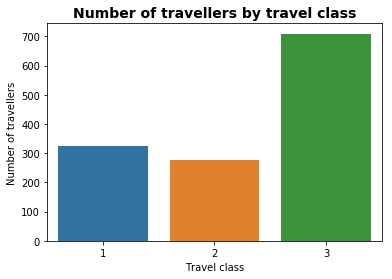

In [39]:
plot_hist(titanic_excel['pclass'], 'pclass', 'Number of travellers by travel class', 'Travel class',
         'Number of travellers')

In [ ]:
titanic_html